# Simple Linear Regression on Salary Dataset
___

## Load Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load Dataset

In [2]:
salary = pd.read_csv('Salary_Data.csv')

## Understand the data

In [6]:
salary.sample(n=5)

,YearsExperience,Salary
13,4.1,57081.0
16,5.1,66029.0
4,2.2,39891.0
11,4.0,55794.0
12,4.0,56957.0


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
salary.shape

(30, 2)

In [10]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Visualise the data

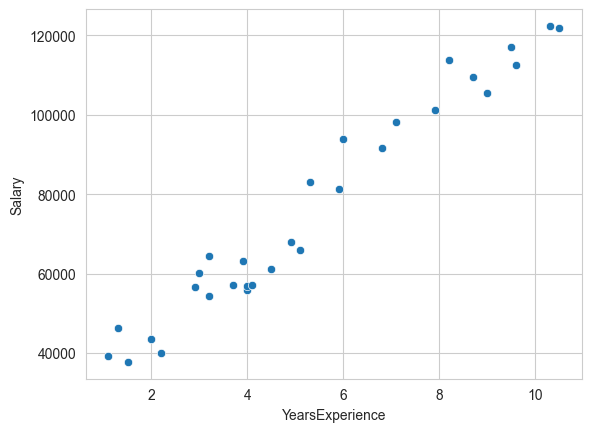

In [16]:
sns.scatterplot(data=salary, x='YearsExperience', y='Salary')
plt.show()

In [17]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

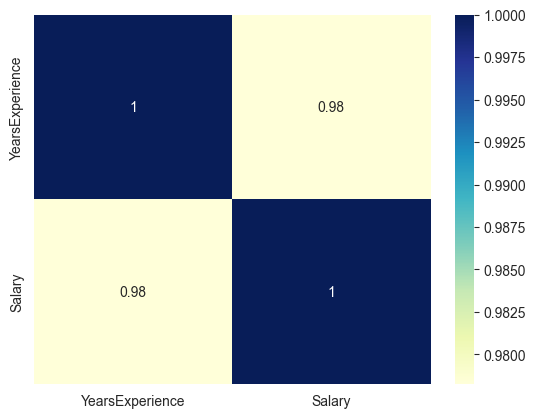

In [21]:
sns.heatmap(salary.corr(), annot=True, cmap='YlGnBu')

## Perform Simple Linear Regression

In [31]:
X = salary['YearsExperience']

In [32]:
y = salary['Salary']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
X_train.shape

(21,)

In [35]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [36]:
X_train.shape

(21, 1)

In [38]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [39]:
# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
print(lm.intercept_)
print(lm.coef_)

26777.391341197625
[9360.26128619]


In [41]:
y_train_pred = lm.predict(X_train)

In [42]:
y_test_pred = lm.predict(X_test)

In [45]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9423777652193379
0.9740993407213511


## Visualising the Fit

### Training Set

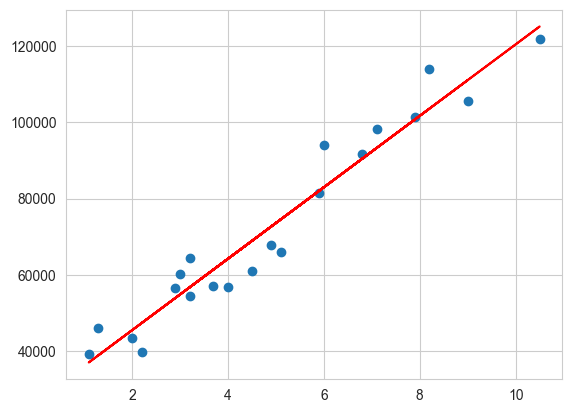

In [54]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.intercept_ + lm.coef_ * X_train, 'r')
plt.show()

### Test Set

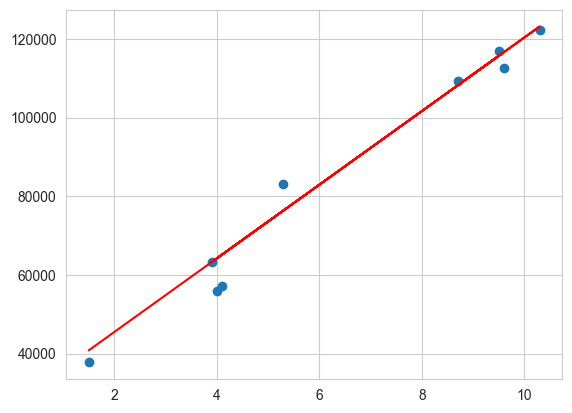

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lm.intercept_ + lm.coef_ * X_test, 'r')
plt.show()

## Summary
___
### So, the r2_score is perfect and close as well for Train and Test data.


## So, what does this mean? How can we use it for prediction?

### Let's predict a salary for a person with experience of 20 Years.

In [53]:
pd.DataFrame([20])

,0
0,20


In [52]:
lm.predict(pd.DataFrame([20])) # Passing a Dataframe with value of 20

array([213982.61706507])

### So, the salary of a person with 20 Years of experience is 213982.72